### Stock Market Prediction And Forecasting Using Stacked LSTM

1.   Élément de liste
2.   Élément de liste



In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key="b4f4a7dcc631d6adf784088b588ce1c11dca1153"

In [ ]:
df = pdr.get_data_tiingo('AUDJPY', api_key=key)

In [ ]:
df.to_csv('AUDJPY.csv')

In [ ]:
import pandas as pd

In [ ]:
df.head()

close       high  ...  divCash  splitFactor
symbol date                                             ...                      
AUDJPY 2019-01-24 00:00:00+00:00  77.726995  77.786500  ...      0.0          1.0
       2019-01-25 00:00:00+00:00  78.642500  78.826495  ...      0.0          1.0
       2019-01-27 00:00:00+00:00  78.542500  78.708505  ...      0.0          1.0
       2019-01-28 00:00:00+00:00  78.303000  78.824000  ...      0.0          1.0
       2019-01-29 00:00:00+00:00  78.284505  78.478000  ...      0.0          1.0

[5 rows x 12 columns]

In [ ]:
df.tail()

close     high  ...  divCash  splitFactor
symbol date                                         ...                      
AUDJPY 2021-10-18 00:00:00+00:00  84.7500  84.8975  ...      0.0          1.0
       2021-10-19 00:00:00+00:00  85.6250  85.6475  ...      0.0          1.0
       2021-10-20 00:00:00+00:00  85.9675  86.0275  ...      0.0          1.0
       2021-10-21 00:00:00+00:00  84.9725  86.2575  ...      0.0          1.0
       2021-10-22 00:00:00+00:00  84.7425  85.5475  ...      0.0          1.0

[5 rows x 12 columns]

In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0      77.726995
1      78.642500
2      78.542500
3      78.303000
4      78.284505
         ...    
802    84.750000
803    85.625000
804    85.967500
805    84.972500
806    84.742500
Name: close, Length: 807, dtype: float64

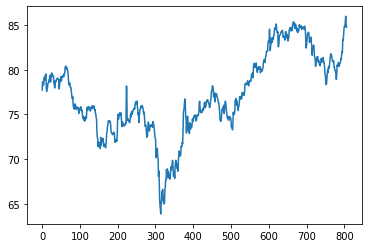

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0      77.726995
1      78.642500
2      78.542500
3      78.303000
4      78.284505
         ...    
802    84.750000
803    85.625000
804    85.967500
805    84.972500
806    84.742500
Name: close, Length: 807, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(524, 283)

In [ ]:
train_data

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(423, 100)
(423,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(182, 100)
(182,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 7s 383ms/step - loss: 0.0957 - val_loss: 0.0244
Epoch 2/100
7/7 [==============================] - 1s 175ms/step - loss: 0.0186 - val_loss: 0.0993
Epoch 3/100
7/7 [==============================] - 1s 178ms/step - loss: 0.0121 - val_loss: 0.0198
Epoch 4/100
7/7 [==============================] - 1s 176ms/step - loss: 0.0083 - val_loss: 0.0266
Epoch 5/100
7/7 [==============================] - 1s 180ms/step - loss: 0.0068 - val_loss: 0.0465
Epoch 6/100
7/7 [==============================] - 1s 175ms/step - loss: 0.0063 - val_loss: 0.0192
Epoch 7/100
7/7 [==============================] - 1s 176ms/step - loss: 0.0060 - val_loss: 0.0299
Epoch 8/100
7/7 [==============================] - 1s 178ms/step - loss: 0.0057 - val_loss: 0.0213
Epoch 9/100
7/7 [==============================] - 1s 178ms/step - loss: 0.0054 - val_loss: 0.0178
Epoch 10/100
7/7 [==============================] - 1s 177ms/step - loss: 0.0052 - val_loss: 0.0180
Epoch 11/

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

73.04136464325396

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

80.38080066511463

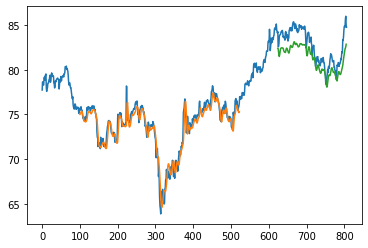

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

283

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8978182497059164,
 0.8679113959613058,
 0.8801460179477378,
 0.8790131825786234,
 0.8906813868804981,
 0.8945330271354854,
 0.8608878166727991,
 0.856243191659432,
 0.8028866457741621,
 0.8411764812502156,
 0.8452546885790255,
 0.8429890178407979,
 0.8535243867735582,
 0.833246633666417,
 0.797222468928592,
 0.7935973957474265,
 0.7831753103515782,
 0.7463581608553729,
 0.7599521852847406,
 0.777284566432185,
 0.7881597859756799,
 0.7951833652641866,
 0.7955232158749204,
 0.7955232158749204,
 0.7696945694591215,
 0.7779642676536533,
 0.7713938225127923,
 0.7559872614928413,
 0.7546278590499047,
 0.7491902492781577,
 0.7577997980834241,
 0.7687883011638297,
 0.7863472493850971,
 0.778304118264388,
 0.7693547188483869,
 0.7689015847007417,
 0.7786439688751217,
 0.7911051579353763,
 0.7770579993583624,
 0.7641436761504625,
 0.7634639749289942,
 0.7395611486406883,
 0.7058026546410905,
 0.703650267439774,
 0.6592431209705052,
 0.6542586453464034,
 0.657657151453745,
 0.6871108710507094,

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.85183984]
101
1 day input [0.8679114  0.88014602 0.87901318 0.89068139 0.89453303 0.86088782
 0.85624319 0.80288665 0.84117648 0.84525469 0.84298902 0.85352439
 0.83324663 0.79722247 0.7935974  0.78317531 0.74635816 0.75995219
 0.77728457 0.78815979 0.79518337 0.79552322 0.79552322 0.76969457
 0.77796427 0.77139382 0.75598726 0.75462786 0.74919025 0.7577998
 0.7687883  0.78634725 0.77830412 0.76935472 0.76890158 0.77864397
 0.79110516 0.777058   0.76414368 0.76346397 0.73956115 0.70580265
 0.70365027 0.65924312 0.65425865 0.65765715 0.68711087 0.70886131
 0.73083832 0.71418564 0.74409249 0.74647144 0.73650249 0.75406144
 0.77932367 0.79019889 0.81047664 0.80719142 0.80537888 0.7963162
 0.78124949 0.76958129 0.77026099 0.77320636 0.77592516 0.74227995
 0.74329951 0.72857265 0.72426787 0.72449444 0.70466982 0.67997401
 0.70387683 0.75315517 0.74919025 0.75122935 0.76527651 0.76550308
 0.74590503 0.75576069 0.75723338 0.76210457 0.77003442 0.78646053
 0.78090964 0.80673829 0.8211253  0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

807

In [ ]:
rt=len(df1)-100

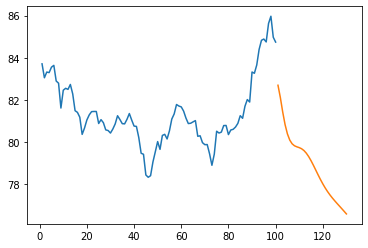

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[rt:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

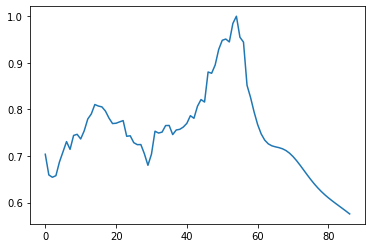

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[750:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

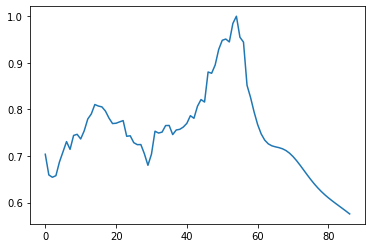

In [ ]:
plt.plot(df3[750:])